In [ ]:
importimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fd lab/twitter_training.csv')
df

,Tweet_ID,Brand,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## check infos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Brand          74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## prepocessing

## check nulls

In [ ]:
df['Tweet_content'].isna().sum()

686

In [ ]:
df[df.Tweet_content.isna()==True]

,Tweet_ID,Brand,Sentiment,Tweet_content
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


## drop nulls

In [ ]:
df.dropna(inplace=True)
df

,Tweet_ID,Brand,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df

,Tweet_ID,Brand,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df['Brand'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

## define preprocessing function to remove stop words and lemmatize the text

In [ ]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

## apply fuction to data

In [ ]:
df['textPreprocessed']=df['Tweet_content'].apply( preprocess)
df

,Tweet_ID,Brand,Sentiment,Tweet_content,textPreprocessed
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


## eda

Text(0.5, 1.0, 'Category Distribution')

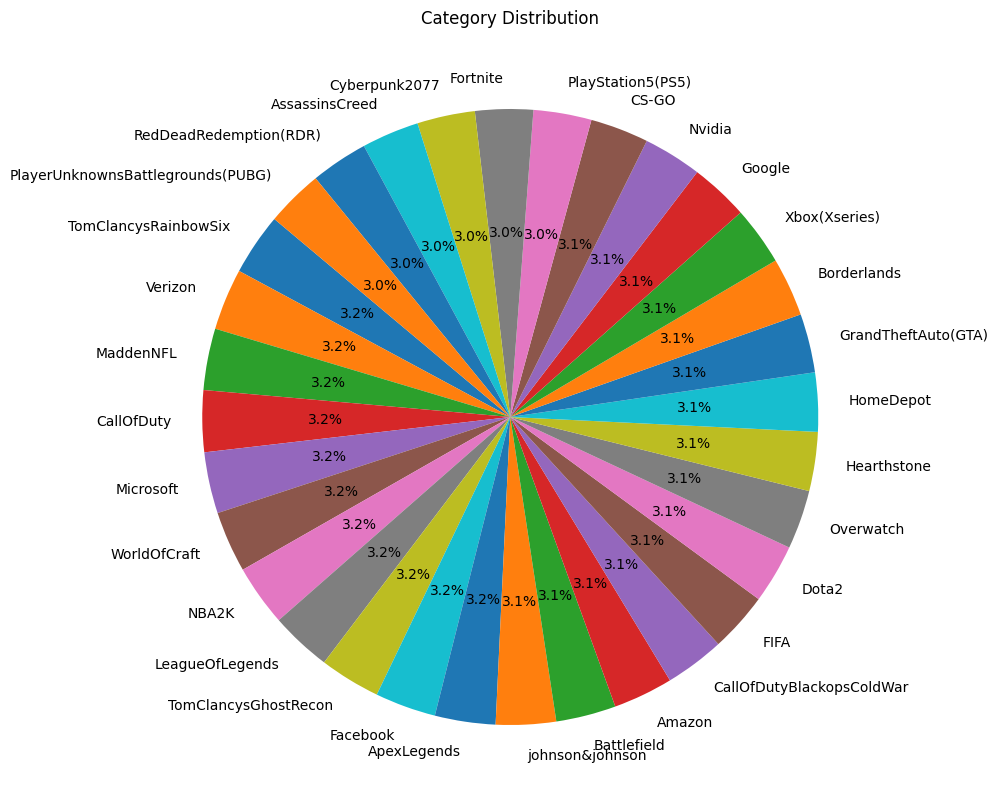

In [ ]:
value_counts= df['Brand'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")

## sentiment

In [ ]:
df['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

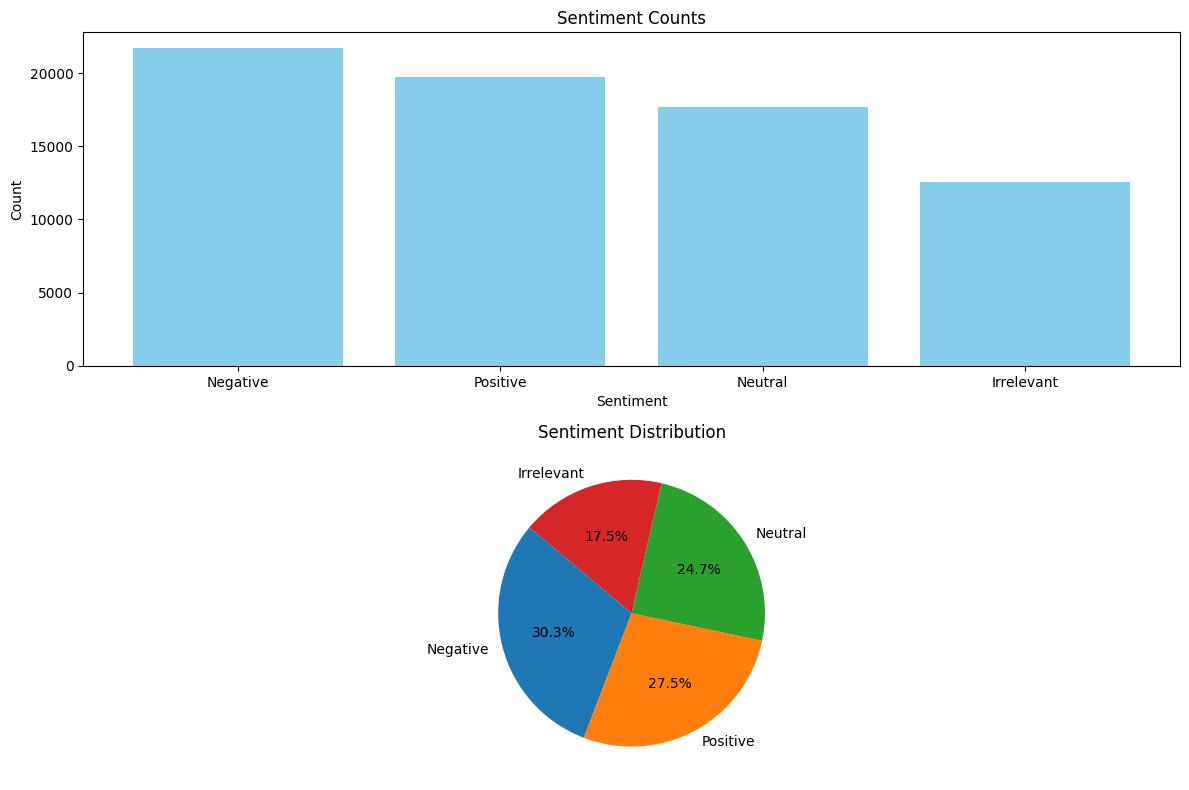

In [ ]:
value_counts = df['Sentiment'].value_counts()
# Create a figure with subplots
plt.figure(figsize=(12, 8))
# Bar plot
plt.subplot(2, 1, 1)  # First subplot (2 rows, 1 column, 1st plot)
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
# Pie chart
plt.subplot(2, 1, 2)  # Second subplot (2 rows, 1 column, 2nd plot)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


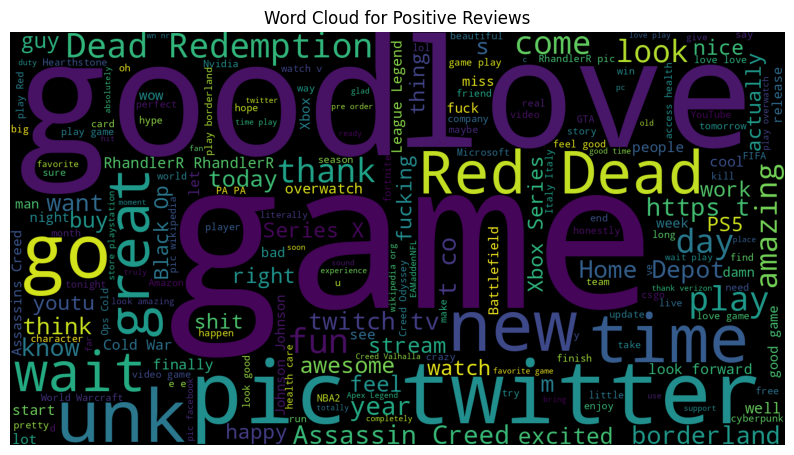

In [ ]:
positive_reviews = df[df['Sentiment'] == 'Positive']['textPreprocessed']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',

                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

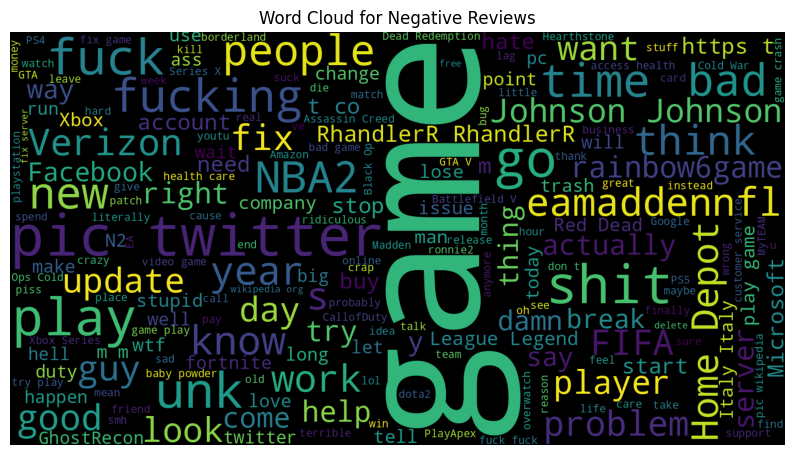

In [ ]:
negative_reviews = df[df['Sentiment'] == 'Negative']['textPreprocessed']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',

                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

(-0.5, 1499.5, 799.5, -0.5)

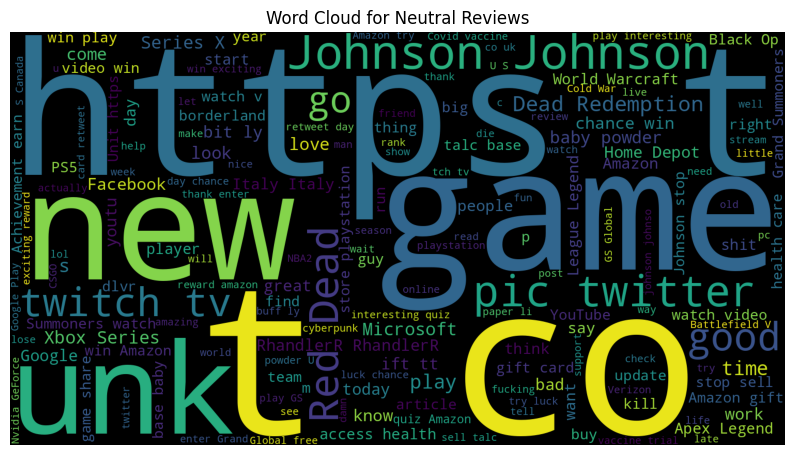

In [ ]:
Neutral_reviews = df[df['Sentiment'] == 'Neutral']['textPreprocessed']
pos = ' '.join(map(str, Neutral_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',

                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

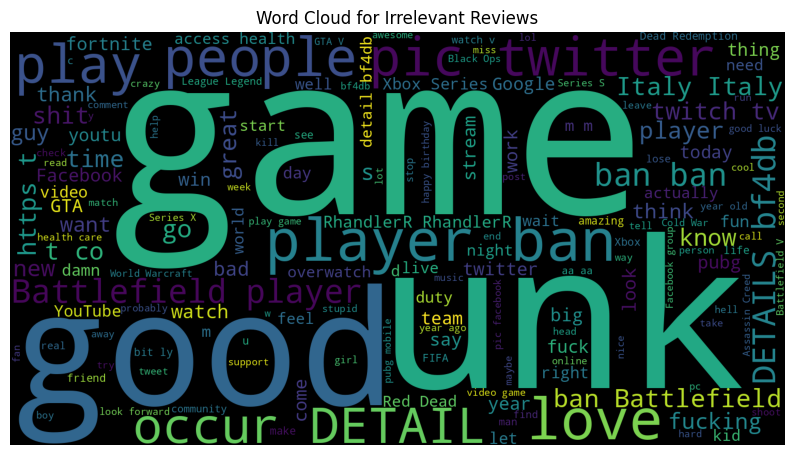

In [ ]:
Irrelevant_reviews = df[df['Sentiment'] == 'Irrelevant']['textPreprocessed']
pos = ' '.join(map(str, Irrelevant_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',

                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Irrelevant Reviews')
plt.axis('off')

## Bivariate Analysis

<Axes: xlabel='Brand'>

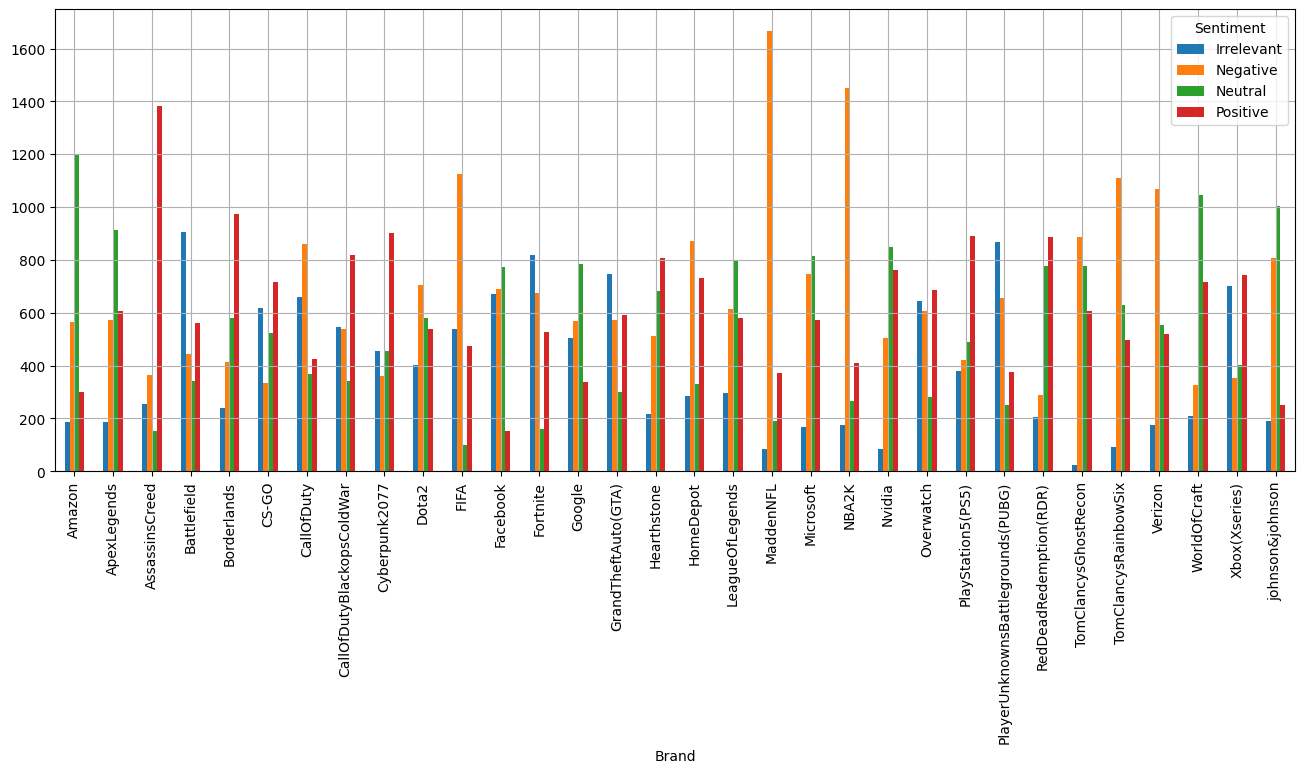

In [ ]:
reactions_entities = pd.crosstab(df['Brand'],df['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

## train test split

## drop unnecessary columns

In [ ]:
x=df['textPreprocessed']
y=df['Sentiment']

## encode Categorical Data

In [ ]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## make the pipeline

In [ ]:
randomforest=RandomForestClassifier ()
pipeline= Pipeline(steps=[

                        ('TfidfVectorize',TfidfVectorizer()) ,
                         ('randomforest',randomforest)
                        ])

## train the pipeline

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('TfidfVectorize', TfidfVectorizer()),
                ('randomforest', RandomForestClassifier())])

## evaluate pipeline

In [ ]:
pipeline.score(x_test,y_test)

0.9100551252529482

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print(conf_matrix_nb)

[[2131  100   58  218]
 [  25 4019   64  232]
 [  22  105 3178  236]
 [  31  117   81 3714]]


In [ ]:
from sklearn.metrics import classification_report
classification_re = classification_report(y_test, y_pred)
print(classification_re)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2507
           1       0.93      0.93      0.93      4340
           2       0.94      0.90      0.92      3541
           3       0.84      0.94      0.89      3943

    accuracy                           0.91     14331
   macro avg       0.92      0.90      0.91     14331
weighted avg       0.91      0.91      0.91     14331



In [ ]:
import joblib

# Save the pipeline model to a file
joblib.dump(pipeline, 'randomforest_pipeline_model.pkl')
print("Model saved as randomforest_pipeline_model.pkl")


Model saved as randomforest_pipeline_model.pkl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fromfromfromfromfromfromfromfrom google.colab import files

# Download the saved model file
files.download('randomforest_pipeline_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive

# Mount Googledrive'Googledrive'
drive.mount('/content/drivdrive'e')

Mounted at /content/drive
